# Gradient Vanishing

This notebook demonstrates gradient vanishing problem for various neuron activation functions.

## Sigmoid

Sigmoid activation function is defined as follows:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

It is worth noting that $y^{\prime} = \sigma^{\prime}(x) = y \cdot (1-y)$. Indeed:
$$
\frac{dy}{dx} = -\frac{1}{(1+e^{-x})^{2}}\cdot(-e^{-x}) = 
\newline
= \frac{1}{1+e^{-x}}\cdot\frac{-e^{-x}}{1+e^{-x}} = 
\newline
= \frac{1}{1+e^{-x}} \cdot \left( 1 - \frac{1}{1+e^{-x}} \right) = 
\newline
= y \cdot (1-y)
$$

Now let's draw a sigmoid plot:

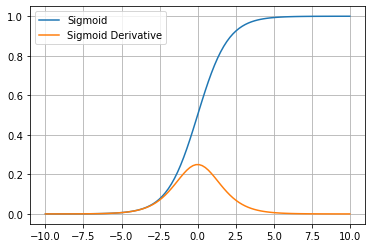

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Calculate function values
x = np.linspace(start=-10, stop=10, num=100)
y = sigmoid(x)
dy = y*(1-y)

# Draw sigmoid and its derivative
plt.plot(x, y, label="Sigmoid")
plt.plot(x, dy, label="Sigmoid Derivative")
plt.legend()
plt.grid()

Note that $\sigma(x)\xrightarrow[x\to \infty]{} 1$ and $\sigma(x)\xrightarrow[x\to -\infty]{} 0$ and so 
$$
\sigma^{\prime}(x) = \sigma(x)\cdot(1 - \sigma(x)) \xrightarrow[|x|\to \infty]{} 0
$$

## Experiment: bad weight initialization

Let's consider a single sigmoid layer with weights $W_{i,j}$ which accepts a vector of values $x$ and outputs a vector $y$, where

$$ 
y_i = \frac{1}{1 + e^{\sum_{j=1}^{n}W_{i,j}\cdot x_{j}}}
$$

So the gradient $\nabla y_{i}$ would be

$$
\left(\nabla_W y_{i}\right)_{j} = y_i\cdot(1-y_i)\cdot x_j
$$

So when $W_{i,j}$ is initialized with large numbers, then $y_i$ is close to $1$ or $0$, in both cases components of $\nabla y$ diminish very rapidly.  

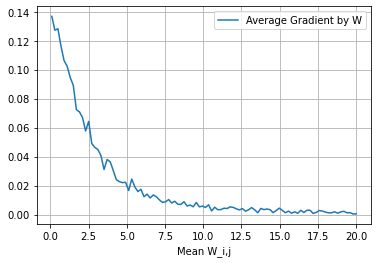

In [49]:
import numpy.random as nr

def calculate_dW(mean_W:float=1.0, dim:int=3) -> float:
    """Get average y gradient by the W_i,j components."""
    x = nr.rand(dim)
    W = nr.rand(dim, dim) * mean_W
    y = sigmoid(np.dot(W, x))
    dW = np.outer(y*(1-y), x)
    return np.mean(dW)


def experiment(mean_W:float, count:int=30, dim:int=3):
    """Average gradient by carrying out random experiment count times."""
    return sum(calculate_dW(mean_W, dim=dim) for _ in range(count))/count


average_W = np.linspace(0.1, 20, 100)
average_dW = np.array(list(map(experiment, average_W)))

plt.plot(average_W, average_dW, label="Average Gradient by W")
plt.xlabel("Mean W_i,j")
plt.legend()
plt.grid()

## Mulitlayer Sigmoid

Also notice that sigmoid derivative is 0.25 at max. So if sigmoid layers are stacked sequentially, gradient of the initial layers is at max $0.25^N$ where $N$ is a number of layers.

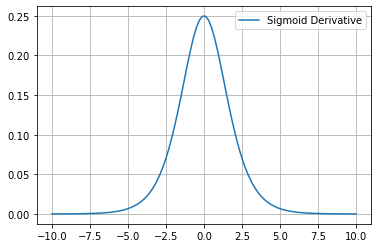

In [50]:
plt.plot(x, dy, label="Sigmoid Derivative")
plt.legend()
plt.grid()